## Loading the data



In [55]:
import os

os.listdir(r"K:\Projects\SickKids_Brain_Preprocessing\preprocessed_all_seq_kk_july_2022")

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '139',
 '14',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '222',
 '223',
 '225',
 '226',


In [56]:
os.chdir(
    r"K:\Projects\SickKids_Brain_Preprocessing\preprocessed_all_seq_kk_july_2022")  # we could also use "cd" but that would not be a python command

In [57]:
os.getcwd()

'K:\\Projects\\SickKids_Brain_Preprocessing\\preprocessed_all_seq_kk_july_2022'

In [58]:
os.listdir()

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '139',
 '14',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '222',
 '223',
 '225',
 '226',


In [59]:
import glob


def load_image_data(path, patients, limit=False):
    data_images = {}
    for root, dirs, files in os.walk(path):
        dirs.sort(key=int)
        dirs = list(map(int, dirs))
        dirs = [patient for patient in dirs if patient in patients]
        if limit:
            dirs = dirs[:limit]
        for d in dirs:
            print(f"Loading Patient {d}...")
            np_filenames = glob.glob(f"{os.path.join(root, f'{d}')}/*/*.npy")
            FLAIR = None
            segmentation = None

            target_1 = "preprocessed_FLAIR.npy"
            result_1 = [string for string in np_filenames if target_1 in string]

            target_2 = "preprocessed_segmentation.npy"
            result_2 = [string for string in np_filenames if target_2 in string]

            if result_1:
                FLAIR = np.load(result_1[0])
            if result_2:
                segmentation = np.load(result_2[0])
            if FLAIR is not None and segmentation is not None:
                data_images[d] = [FLAIR, segmentation]
            else:
                print('Data missing.')
        break
    return data_images, dirs

In [60]:
excluded_patients = [2, 3, 4, 6, 7, 9, 11, 12, 13, 16, 21, 23, 25, 28, 29, 30, 33, 35, 36, 37, 38, 44, 45, 49, 50,
                         52, 53, 54, 55, 58, 59, 61, 63, 66, 73, 74, 75, 77, 78, 80, 84, 85, 86, 92, 95, 96, 98, 100,
                         102, 103, 105, 107, 108, 110, 113, 117, 121, 122, 123, 125, 128, 130, 131, 132, 136, 137, 138,
                         139, 140, 141, 142, 143, 147, 148, 150, 152, 156, 158, 159, 165, 166, 171, 173, 174, 176, 182,
                         183, 184, 187, 190, 191, 192, 194, 196, 199, 203, 204, 209, 210, 213, 221, 222, 224, 226, 227,
                         228, 232, 233, 234, 235, 237, 240, 242, 243, 245, 246, 250, 254, 255, 256, 258, 259, 260, 261,
                         263, 264, 266, 270, 272, 274, 277, 278, 283, 284, 285, 288, 293, 298, 299, 303, 306, 309, 311,
                         312, 317, 318, 321, 322, 324, 325, 327, 328, 330, 332, 333, 334, 336, 337, 341, 343, 347,
                         349, 350, 351, 352, 354, 356, 359, 364, 367, 370, 371, 374, 376, 377, 378, 380, 383, 386, 387,
                         388, 392, 396, 243, 255, 261, 264, 288, 299, 309, 327, 351, 387]

In [61]:
import numpy as np

radiomics_patients_list = set(range(1, 398))
final_inclusion_list = set([319])
# final_inclusion_list = set([x for x in radiomics_patients_list if x not in excluded_patients])
patients_with_FLAIR = []
image_directory = r'K:\Projects\SickKids_Brain_Preprocessing\preprocessed_all_seq_kk_july_2022'
for each_patient in os.listdir(image_directory):
    try:
        patients_with_FLAIR.append(int(each_patient))
    except:
        print("Patient not found.")
patients_with_FLAIR.sort(key=int)
patients_list = list(final_inclusion_list.intersection(patients_with_FLAIR))

images, patients_used = load_image_data(image_directory, patients=patients_list)

Loading Patient 319...


In [62]:
data_pre_norm = {}
for each_patient in patients_used:
    image = images[each_patient][0]
    seg = images[each_patient][1]
    data_pre_norm[each_patient] = (image, seg)

In [63]:
data = {}
for each_patient in data_pre_norm.keys():
    image_pre_norm = data_pre_norm[each_patient][0]
    seg = data_pre_norm[each_patient][1]
    image_post_norm = (image_pre_norm - np.min(image_pre_norm)) / (np.max(image_pre_norm) - np.min(image_pre_norm))
    data[each_patient] = (image_post_norm, seg)

In [64]:
for each_patient in data.keys():
    if np.max(data[each_patient][0]) != 1 or np.min(data[each_patient][0]) != 0:
        print(each_patient)
        print(np.max(data[each_patient][0]))
        print(np.min(data[each_patient][0]))
        continue
    np.save(os.path.join(os.getcwd(), f"{each_patient}\FLAIR\preprocessed_FLAIR_normalized.npy"), data[each_patient][0])

In [65]:
flair_img = data[list(data.keys())[0]][0]
segmentation = data[list(data.keys())[0]][1]

In [66]:
flair_img_pre_norm = data[list(data.keys())[0]][0]
segmentation_pre_norm = data[list(data.keys())[0]][1]

In [67]:
flair_img.shape

(240, 240, 155)

In [68]:
segmentation.shape

(240, 240, 155)

unique values in the segmentation are: [0. 1.]


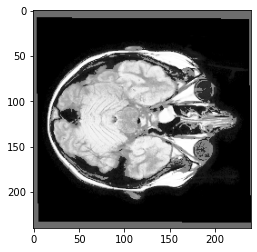

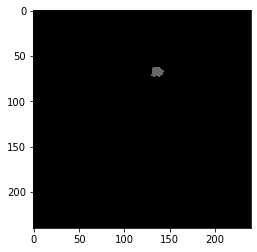

In [69]:
import matplotlib.pyplot as plt
import matplotlib


def plot_segmentation(seg):
    cmap = matplotlib.colors.ListedColormap(["black", "dimgrey", "forestgreen", "darkorange"])
    plt.figure()
    plt.imshow(seg, cmap=cmap, vmin=0, vmax=3)


plt.figure()
plt.imshow(flair_img[:, :, 45], cmap='gray')
plot_segmentation(segmentation[:, :, 45])

print("unique values in the segmentation are:", np.unique(segmentation))

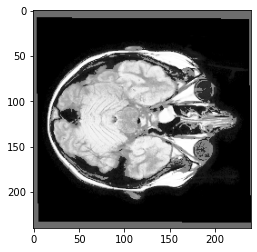

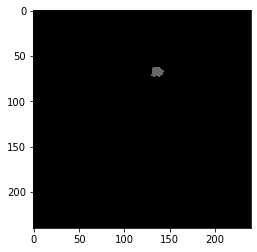

In [70]:
plt.figure()
plt.imshow(flair_img_pre_norm[:, :, 45], cmap='gray')
plot_segmentation(segmentation_pre_norm[:, :, 45])

minimum intensity value in the FLAIR image is: 0.429202122125838
maximum intensity value in the FLAIR image is: 0.429202122125838
Average intensity value in the FLAIR image is: 0.4292021221258382


Text(0.5, 1.0, 'Histogram of intensities in the FLAIR image')

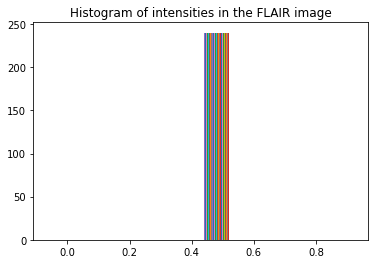

In [71]:
# Statistics of the image
import numpy as np

print("minimum intensity value in the FLAIR image is:", np.min(flair_img[4, :, :]))
print("maximum intensity value in the FLAIR image is:", np.max(flair_img[4, :, :]))
print("Average intensity value in the FLAIR image is:", np.mean(flair_img[4, :, :]))
plt.hist(flair_img[4, :, :])
plt.title("Histogram of intensities in the FLAIR image")

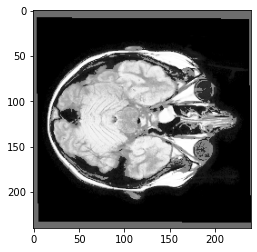

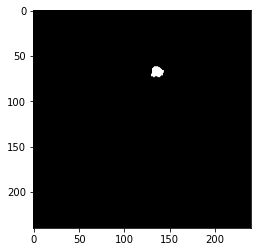

In [72]:
import copy


def seg_to_binary(seg):
    local_seg = copy.deepcopy(seg)
    local_seg[local_seg > 0] = 1
    return local_seg


seg = seg_to_binary(segmentation[:, :, 45])
plt.figure()
plt.imshow(flair_img[:, :, 45], cmap='gray')
plt.figure()
plt.imshow(seg, cmap='gray')

Text(0, 0.5, 'Surface Area')

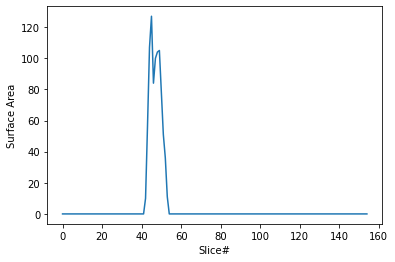

In [73]:
loc = []
tumor_area = []
for i in range(segmentation.shape[2]):
    loc.append(i)
    seg = seg_to_binary(segmentation[:, :, i])
    tumor_area.append(np.sum(seg))

plt.plot(loc, tumor_area)
plt.xlabel("Slice#")
plt.ylabel("Surface Area")

The index slice is located at loc# 45


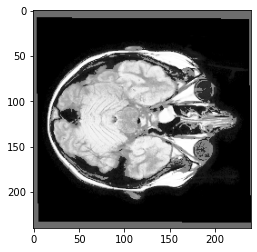

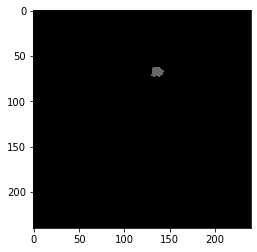

In [74]:
ind = np.argmax(tumor_area)

print("The index slice is located at loc#", ind)


def refine_seg(seg):
    local_seg = copy.deepcopy(seg)
    local_seg[local_seg == 4] = 3
    return local_seg


seg = refine_seg(segmentation[:, :, ind])

plt.figure()
plt.imshow(flair_img[:, :, ind], cmap='gray')
plot_segmentation(seg)

In [75]:
import SimpleITK as sitk
from radiomics import featureextractor


def radiomics_extractor(img, msk):
    print(img.shape)
    img = img.transpose(2, 0, 1)
    print(img.shape)
    msk = msk.transpose(2, 0, 1)
    img_sitk = sitk.GetImageFromArray(img)
    print(img_sitk.GetSize())
    msk_sitk = sitk.GetImageFromArray(msk)
    print(msk_sitk.GetSize())

    extractor = featureextractor.RadiomicsFeatureExtractor()

    featureVector = extractor.execute(img_sitk, msk_sitk)

    return featureVector


seg = seg_to_binary(segmentation)
radiomics = radiomics_extractor(flair_img, seg)

print(type(radiomics))

(240, 240, 155)
(155, 240, 240)
(240, 240, 155)
(240, 240, 155)


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


<class 'collections.OrderedDict'>


In [76]:
print(len(radiomics.keys()))


129


In [77]:
# Extracting full set of radiomics
def radiomics_extractor(img, msk):
    img = img.transpose(2, 0, 1)
    msk = msk.transpose(2, 0, 1)
    img_sitk = sitk.GetImageFromArray(img)
    msk_sitk = sitk.GetImageFromArray(msk)

    extractor = featureextractor.RadiomicsFeatureExtractor()
    extractor.enableAllImageTypes()
    extractor.enableAllFeatures()

    featureVector = extractor.execute(img_sitk, msk_sitk)

    return featureVector


seg = seg_to_binary(segmentation)
radiomics = radiomics_extractor(flair_img, seg)

print(type(radiomics))
print(len(radiomics.keys()))

parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "skimage", cannot implement filter LBP 2D
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, t

<class 'collections.OrderedDict'>
1338


In [78]:
from IPython.display import clear_output

radiomics_results = []
for each_patient in data.keys():
    print(f"Computing features for {each_patient}...")
    mri_data = data[each_patient]
    flair_img = mri_data[0]
    seg = seg_to_binary(mri_data[1])
    radiomics = radiomics_extractor(flair_img, seg)
    updict = {"id": each_patient}
    updict.update(radiomics)
    radiomics_results.append(updict)
    clear_output(wait=True)


Computing features for 319...


parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "skimage", cannot implement filter LBP 2D
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, t

## Saving the results

In [79]:
import os
import LTRI_Funcs as LTRIf

LTRIf.list_of_dict_to_csv(radiomics_results, r"C:\Users\Justin\Documents\Data\radiomics_features_07-18-22.csv")

In [80]:
from IPython.display import clear_output

radiomics_results = []
for each_patient in data.keys():
    print(f"Computing features for {each_patient}...")
    mri_data = data[each_patient]
    flair_img = mri_data[0]
    seg = seg_to_binary(mri_data[1])
    radiomics = radiomics_extractor(flair_img, seg)
    updict = {"id": each_patient}
    updict.update(radiomics)
    radiomics_results.append(updict)
    clear_output(wait=True)


Computing features for 319...


parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "skimage", cannot implement filter LBP 2D
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, t

## Saving the results

In [81]:
import os
import LTRI_Funcs as LTRIf

LTRIf.list_of_dict_to_csv(radiomics_results, r"C:\Users\Justin\Documents\Data\radiomics_features_07-18-22.csv")

In [82]:
from IPython.display import clear_output

radiomics_results = []
for each_patient in data.keys():
    print(f"Computing features for {each_patient}...")
    mri_data = data[each_patient]
    flair_img = mri_data[0]
    seg = seg_to_binary(mri_data[1])
    radiomics = radiomics_extractor(flair_img, seg)
    updict = {"id": each_patient}
    updict.update(radiomics)
    radiomics_results.append(updict)
    clear_output(wait=True)


'K:\\Projects\\SickKids_Brain_Preprocessing\\preprocessed_all_seq_kk_july_2022'

## Saving the results

In [209]:
import os
import LTRI_Funcs as LTRIf

LTRIf.list_of_dict_to_csv(radiomics_results, r"C:\Users\Justin\Documents\Data\radiomics_features_07-18-22.csv")

In [210]:
os.getcwd()

'K:\\Projects\\SickKids_Brain_Preprocessing\\preprocessed_FLAIR_from_tumor_seg_dir'